## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from matplotlib import style

In [2]:
style.use('ggplot')

## Buscando os dados

Dados: paridade USD/BRL

In [3]:
inicio = '2019-06-01'

In [4]:
usd_brl = yf.download('USDBRL=X', start=inicio)['Adj Close']
usd_brl.tail()

[*********************100%***********************]  1 of 1 completed


Date
2021-11-08    5.5411
2021-11-09    5.5431
2021-11-10    5.4791
2021-11-11    5.4899
2021-11-12    5.3980
Name: Adj Close, dtype: float64

In [5]:
print(len(usd_brl))

640


Gráfico: USD/BRL

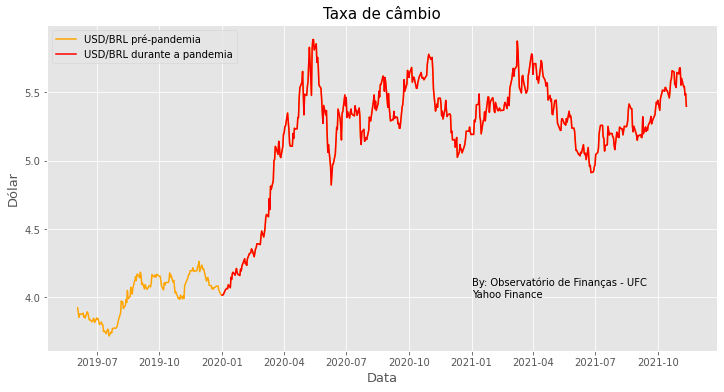

In [6]:
plt.figure(figsize=(12, 6));
plt.title('Taxa de câmbio', fontsize=15);
plt.xlabel('Data', fontsize=13);
plt.ylabel('Dólar', fontsize=13);
plt.text(np.datetime64('2021-01-01'), 4.0, f'By: Observatório de Finanças - UFC\nYahoo Finance')
x, = plt.plot(usd_brl, color='orange', label='USD/BRL pré-pandemia');
y, = plt.plot(usd_brl[usd_brl.index.year >= 2020], color='red', label='USD/BRL durante a pandemia')
plt.legend(loc=2);

Dados: inflação

In [7]:
url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.13522/dados?formato=json&dataInicial=01/01/2019&dataFinal=12/11/2021'

In [8]:
ipca = pd.read_json(url)

ipca['data'] = pd.to_datetime(ipca['data'], dayfirst=True)
ipca.set_index('data', inplace=True)

ipca.head()

,valor
data,
2019-01-01,3.78
2019-02-01,3.89
2019-03-01,4.58
2019-04-01,4.94
2019-05-01,4.66


In [9]:
print(len(ipca))

34


Gráfico: IPCA

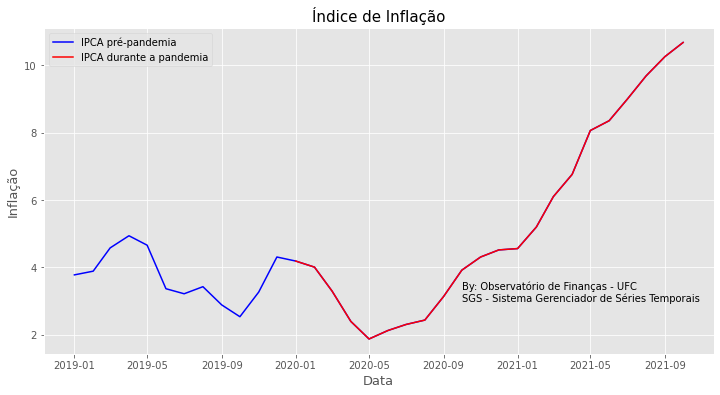

In [10]:
plt.figure(figsize=(12, 6));
plt.title('Índice de Inflação', fontsize=15);
plt.xlabel('Data', fontsize=13);
plt.ylabel('Inflação', fontsize=13);
plt.text(np.datetime64('2020-10-01'), 3.0, f'By: Observatório de Finanças - UFC\nSGS - Sistema Gerenciador de Séries Temporais')
x, = plt.plot(ipca, color='blue', label='IPCA pré-pandemia');
y, = plt.plot(ipca[ipca.index.year >= 2020], color='red', label='IPCA durante a pandemia')
plt.legend(loc=2);

Dados: Taxa de desocupação

In [11]:
url1 = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.24369/dados?formato=json&dataInicial=01/01/2019&dataFinal=12/11/2021'

In [12]:
pnad = pd.read_json(url1)

pnad['data'] = pd.to_datetime(pnad['data'], dayfirst=True)
pnad.set_index('data', inplace=True)

pnad.head()

,valor
data,
2019-01-01,12.0
2019-02-01,12.4
2019-03-01,12.7
2019-04-01,12.5
2019-05-01,12.3


In [13]:
print(len(pnad))

32


Gráfico: Taxa de desocupação

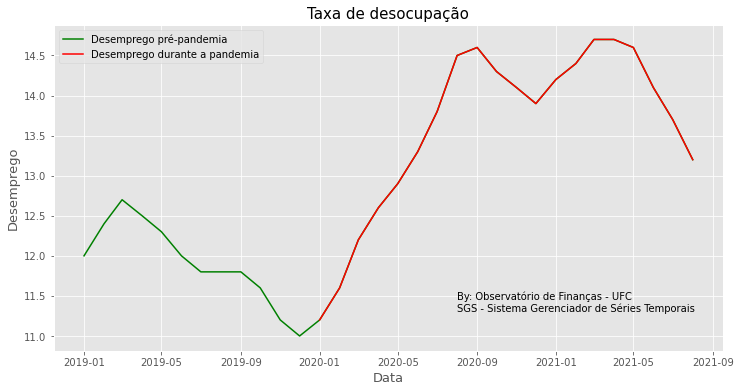

In [14]:
plt.figure(figsize=(12, 6));
plt.title('Taxa de desocupação', fontsize=15);
plt.xlabel('Data', fontsize=13);
plt.ylabel('Desemprego', fontsize=13);
plt.text(np.datetime64('2020-08-01'), 11.3, f'By: Observatório de Finanças - UFC\nSGS - Sistema Gerenciador de Séries Temporais')
x, = plt.plot(pnad, color='green', label='Desemprego pré-pandemia');
y, = plt.plot(pnad[pnad.index.year >= 2020], color='red', label='Desemprego durante a pandemia')
plt.legend(loc=2);

In [15]:
print(len(pnad))

32


Dados: Atividade econômica

In [16]:
url2 = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.24363/dados?formato=json&dataInicial=01/01/2019&dataFinal=12/11/2021'

In [17]:
ibc = pd.read_json(url2)

ibc['data'] = pd.to_datetime(ibc['data'], dayfirst=True)
ibc.set_index('data', inplace=True)

ibc.head()

,valor
data,
2019-01-01,133.41
2019-02-01,133.76
2019-03-01,138.98
2019-04-01,139.48
2019-05-01,139.24


In [18]:
print(len(ibc))

32


Gráfico: Atividade econômica

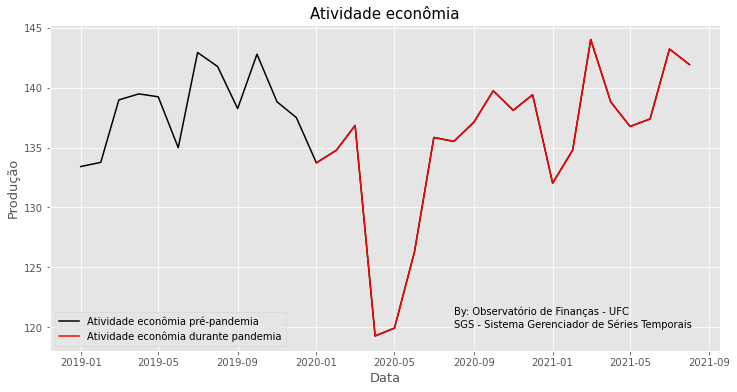

In [19]:
plt.figure(figsize=(12, 6));
plt.title('Atividade econômia', fontsize=15);
plt.xlabel('Data', fontsize=13);
plt.ylabel('Produção', fontsize=13);
plt.text(np.datetime64('2020-08-01'), 120, f'By: Observatório de Finanças - UFC\nSGS - Sistema Gerenciador de Séries Temporais')
x, = plt.plot(ibc, color='black', label='Atividade econômia pré-pandemia');
y, = plt.plot(ibc[ibc.index.year >= 2020], color='red', label='Atividade econômia durante pandemia')
plt.legend(loc=3);

## Gráfico geral

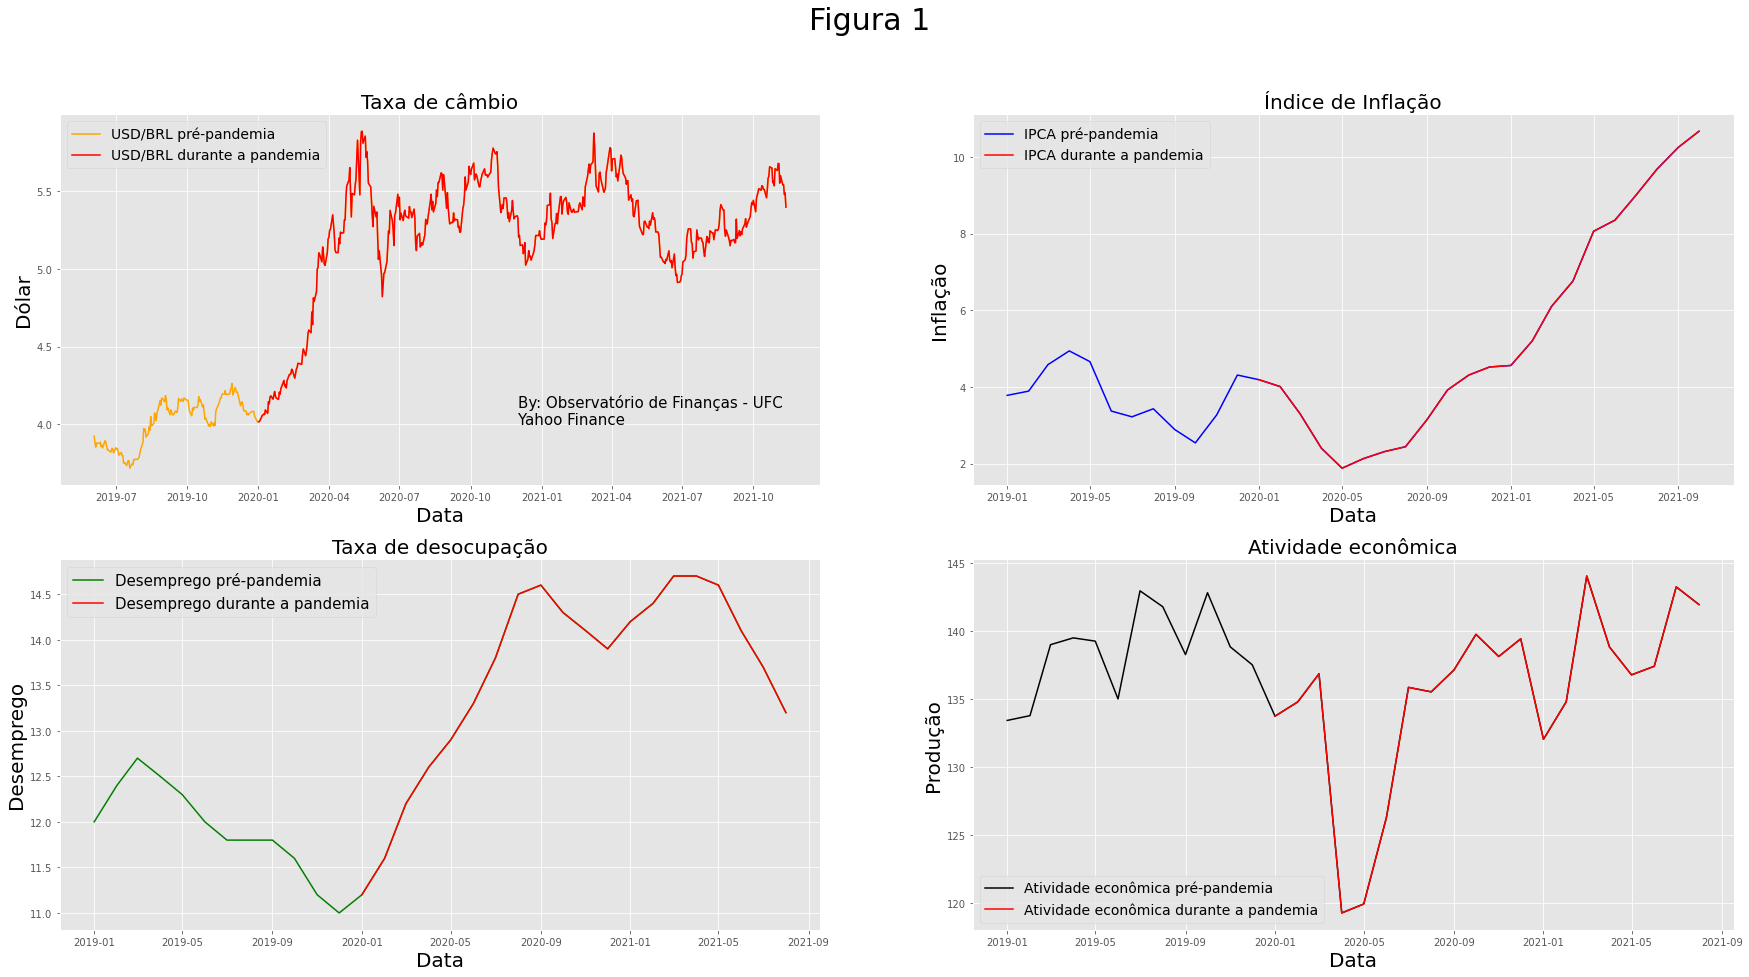

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(30, 15))
fig.suptitle('Figura 1', fontsize=30);

axes[0, 0].plot(usd_brl.index, usd_brl.values, color='orange', label='USD/BRL pré-pandemia');
axes[0, 0].plot(usd_brl[usd_brl.index.year >= 2020], color='red', label='USD/BRL durante a pandemia')
axes[0, 0].set_title('Taxa de câmbio', fontsize=20);
axes[0, 0].set_xlabel('Data', fontsize=20, color='black');
axes[0, 0].set_ylabel('Dólar', fontsize=20, color='black');
axes[0, 0].text(np.datetime64('2020-12-01'), 4.0, f'By: Observatório de Finanças - UFC\nYahoo Finance', fontsize=15);
#axes[0, 0].set_ylim([usd_brl.values[0], usd_brl.values[0]]);
axes[0, 0].legend(loc=2, fontsize=14);

axes[0, 1].plot(ipca.index, ipca.values, color='blue', label='IPCA pré-pandemia');
axes[0, 1].plot(ipca[ipca.index.year >= 2020], color='red', label='IPCA durante a pandemia')
axes[0, 1].set_title('Índice de Inflação', fontsize=20, color='black');
axes[0, 1].set_xlabel('Data', fontsize=20, color='black');
axes[0, 1].set_ylabel('Inflação', fontsize=20, color='black');
#axes[0, 1].text(np.datetime64('2020-10-01'), 3.0, f'By: Observatório de Finanças - UFC\nSGS - Sistema Gerenciador de Séries Temporais')
#axes[0, 1].set_ylim(ipca.values);
axes[0, 1].legend(loc=2, fontsize=14);

axes[1, 0].plot(pnad, color='green', label='Desemprego pré-pandemia');
axes[1, 0].plot(pnad[pnad.index.year >= 2020], color='red', label='Desemprego durante a pandemia')
axes[1, 0].set_title('Taxa de desocupação', fontsize=20, color='black');
axes[1, 0].set_xlabel('Data', fontsize=20, color='black');
axes[1, 0].set_ylabel('Desemprego', fontsize=20, color='black');
#plt.text(np.datetime64('2020-08-01'), 11.3, f'By: Observatório de Finanças - UFC\nSGS - Sistema Gerenciador de Séries Temporais')
axes[1, 0].legend(loc=2, fontsize=15);

axes[1, 1].plot(ibc, color='black', label='Atividade econômica pré-pandemia');
axes[1, 1].plot(ibc[ibc.index.year >= 2020], color='red', label='Atividade econômica durante a pandemia')
axes[1, 1].set_title('Atividade econômica', fontsize=20, color='black');
axes[1, 1].set_xlabel('Data', fontsize=20, color='black');
axes[1, 1].set_ylabel('Produção', fontsize=20, color='black');
#axes[1, 1].text(np.datetime64('2020-08-01'), 120, f'By: Observatório de Finanças - UFC\nSGS - Sistema Gerenciador de Séries Temporais', fontsize=20)
axes[1, 1].legend(loc=3, fontsize=14);

#fig.savefig('/home/brunoalvoliver/Documentos/grafico.png', dpi=500)

SCRIP FINALIZADO!